In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Load the data files
logins_df = pd.read_json('logins.json')
logins_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
logins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
logins_df.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


## Part 1: Exploratory data analysis  
The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate  these login counts based on 15 minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [5]:
#Aggregate based on 15 minute time intervals
logins_df = pd.Series(logins_df, index=logins_df.login_time)


fifteen_min = logins_df.resample('15T').count()
sixty_min = logins_df.resample('60T').count()
daily =  logins_df.resample('D').count()
weekly = logins_df.resample('W').count()
monthly =  logins_df.resample('M').count()


print (fifteen_min.head())
print (sixty_min.head())
print (daily.head())
print (weekly.head())
print (monthly.head())

login_time
1970-01-01 20:00:00    2
1970-01-01 20:15:00    6
1970-01-01 20:30:00    9
1970-01-01 20:45:00    7
1970-01-01 21:00:00    1
Freq: 15T, dtype: int64
login_time
1970-01-01 20:00:00    24
1970-01-01 21:00:00     9
1970-01-01 22:00:00    21
1970-01-01 23:00:00    58
1970-01-02 00:00:00    53
Freq: 60T, dtype: int64
login_time
1970-01-01    112
1970-01-02    681
1970-01-03    793
1970-01-04    788
1970-01-05    459
Freq: D, dtype: int64
login_time
1970-01-04    2374
1970-01-11    5217
1970-01-18    5023
1970-01-25    4751
1970-02-01    4744
Freq: W-SUN, dtype: int64
login_time
1970-01-31    21239
1970-02-28    24673
1970-03-31    33723
1970-04-30    13507
Freq: M, dtype: int64


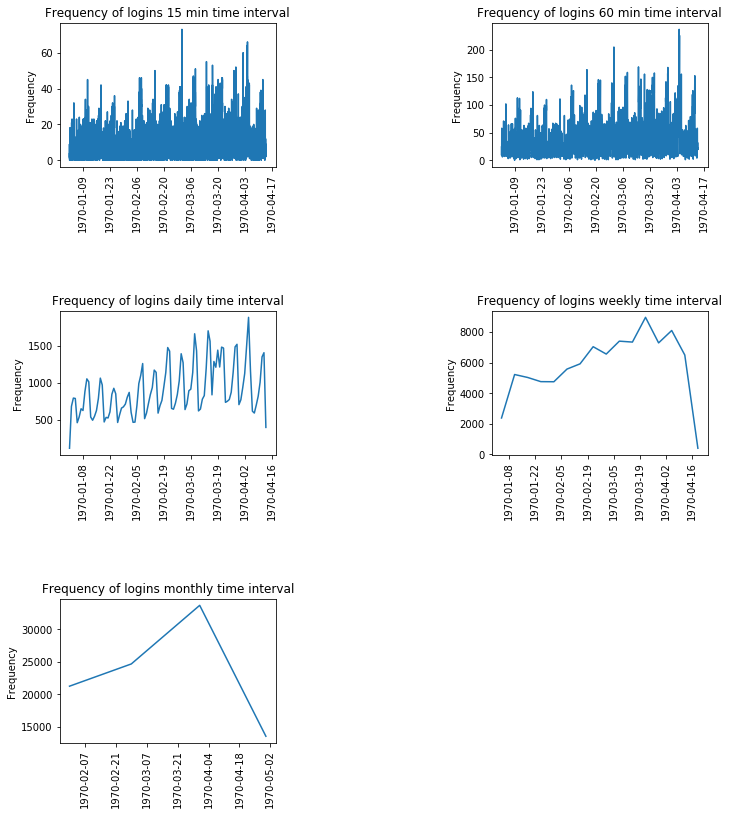

In [6]:
#Plot login times
y_label = 'Frequency'

_ = plt.subplot(321)
_ = plt.plot(fifteen_min)
_ = plt.ylabel(y_label)
_ = plt.title('Frequency of logins 15 min time interval')
_ = plt.xticks(rotation=90)

_ = plt.subplot(322)
_ = plt.plot(sixty_min)
_ = plt.ylabel(y_label)
_ = plt.title('Frequency of logins 60 min time interval')
_ = plt.xticks(rotation=90)

_ = plt.subplot(323)
_ = plt.plot(daily)
_ = plt.ylabel(y_label)
_ = plt.title('Frequency of logins daily time interval')
_ = plt.xticks(rotation=90)

_ = plt.subplot(324)
_ = plt.plot(weekly)
_ = plt.ylabel(y_label)
_ = plt.title('Frequency of logins weekly time interval')
_ = plt.xticks(rotation=90)

_ = plt.subplot(325)
_ = plt.plot(monthly)
_ = plt.ylabel(y_label)
_ = plt.title('Frequency of logins monthly time interval')
_ = plt.xticks(rotation=90)

plt.subplots_adjust(top=3.0, bottom=0.50, left=0.50, right=2.0, hspace=1.0, wspace=1.0)
plt.show()

## Part    2 : Experiment and metrics design  
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most  active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

*1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?*

I would consider the following metrics as KPIs for this experiment:
* Volume of trips- is there an increase in the number of pickups because drivers are more willing to cross the toll for a fare? 
* Revenue- is there an increase in revenue and if so, does the revenue generated exceed the reimbursed toll expenses?
* Wait time between request and pick up- does reimbursing the toll help to decrease the rider wait time and create a better customer experience. A simplified explanation of this, if there were 10 drivers in each city prior to this, but Gotham had higher demand than Metropolis resulting in an average wait time of 20 min in Gotham compared to 10 min in Metropolis this does reimbursing the toll encourage more drivers to help with demand where needed, when needed and thus shorten the wait time.
* The number of new signups- does the reimbursed toll expense cause more people to begin using the service? And does the LTV of those new signups justify the expense?
* The number of miles driven- are the drivers driving more and/or taking longer trips?
* The number of pickups in each city- does the number of trips taken increase, decrease or stay relatively the same compared to before the experiment.



*2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:*

    a. how you will implement the experiment
    
> If the primary KPI is volume. I would analyze a period of time pre experiment compared to post experiment. Ideally, I'd love to analyze the same month YoY to account for any seasonal factors that may influence ridership, so if the experiment is done in February, compare this to the previous February. 
    
> Secondarily, I would want to analyze net revenue (revenue minus the expenses which in this case would be the toll reimbursement) to determine if the increase in volume (assuming there's an increase) generated more net revenue for the month than the control month. 
    
    b. what statistical test(s) you will conduct to verify the significance of the observation

> A two sample t-test to determine if the volume in ridership is statistically greater for the experiment month versus the control month.

    c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

> Depending upon the results of the t-test, if results of the t-test for volume are determined to show with statistical significance that the volumne of ridership is greater during the experiment period, then I would want to dig deeper into the net revenue. I would run a two sample t-test on the revenue for each of the months to determine if the experiment not only generated more volume, but also more revenue.  


## Part    3    ‑    Predictive     modeling    
Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were "active" (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).

In [7]:
import json

with open('./ultimate_data_challenge.json') as file:
    data = json.load(file)

df = pd.DataFrame(data)
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [9]:
#Replace missing values for avg_rating_by_driver and avg_rating_of_driver with the mean


df.avg_rating_by_driver.fillna(df.avg_rating_by_driver.mean(), inplace=True)
df.avg_rating_of_driver.fillna(df.avg_rating_of_driver.mean(), inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [10]:
#Explore the phone data since it's the only other column that's missing values.

df.phone.value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [11]:
#Since nearly 70% of the phones are iPhones, replace missing values with iPhone

df.phone.fillna('iPhone', inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     50000 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [12]:
df2 = df.sort_values('last_trip_date', ascending=False)

print(df2.head())

       avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
4486      11.94                   5.0                   5.0       1.00   
43047      5.49                   4.7                   5.0       1.01   
24059      8.62                   4.9                   4.3       1.11   
40290      7.51                   4.8                   4.9       1.02   
28689     16.32                   5.0                   5.0       1.00   

                 city last_trip_date    phone signup_date  surge_pct  \
4486       Winterfell     2014-07-01  Android  2014-01-25        0.0   
43047  King's Landing     2014-07-01   iPhone  2014-01-15        0.8   
24059         Astapor     2014-07-01   iPhone  2014-01-24       14.3   
40290  King's Landing     2014-07-01   iPhone  2014-01-07        1.6   
28689  King's Landing     2014-07-01   iPhone  2014-01-16        0.0   

       trips_in_first_30_days  ultimate_black_user  weekday_pct  
4486                        4                 True      

In [13]:
#Create a new column that identifies "retained" customers if they've taken a trip within the preceding 30 days (last date on file is 7/1/14).

df['retained'] = [1 if ele >= '2014-06-01' else 0 for ele in df['last_trip_date']]

df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


In [14]:
df.retained.value_counts()

0    31196
1    18804
Name: retained, dtype: int64

In [15]:
#Count the number of customers considered retained (took more than 1 trip within 30 days of signup)
ret_status = df['retained'].value_counts()
notret = float(ret_status[0])
retained = float(ret_status[1])
total_subs = float(len(df))
per_not_ret = float(notret/total_subs)
per_retained = float(retained/total_subs)

print('Number of Subscribers Not Retained:',"{0:,.0f}".format(notret))
print('Number of Subscribers Retained:', "{0:,.0f}".format(retained))
print('Percentage of Subscribers Not Retained:', "{:.2%}".format(per_not_ret))
print('Percentage of Subscribers Retained:', "{:.2%}".format(per_retained))

Number of Subscribers Not Retained: 31,196
Number of Subscribers Retained: 18,804
Percentage of Subscribers Not Retained: 62.39%
Percentage of Subscribers Retained: 37.61%


In [16]:
#Count of Ultimate Black Users
df.ultimate_black_user.value_counts()

False    31146
True     18854
Name: ultimate_black_user, dtype: int64

In [17]:
#Count of City
df.city.value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

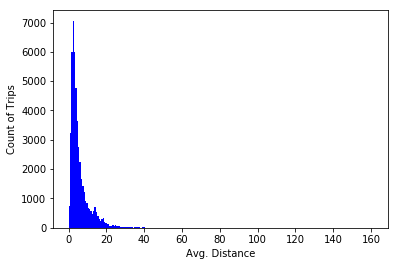

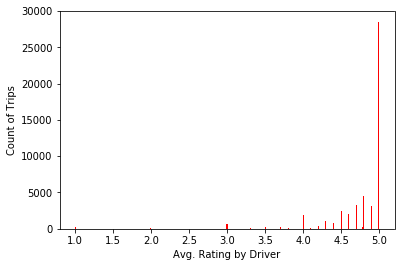

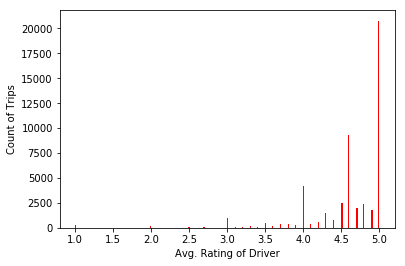

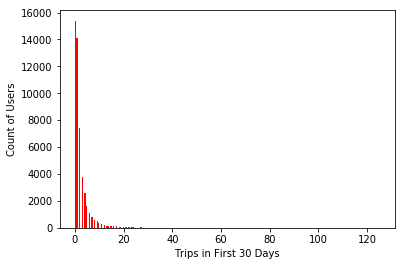

In [18]:
#Create histograms for avg. distance, avg. rating by driver, avg. rating for driver

#Calculate the bin number
n_data = len(df['avg_dist'])
n_bins = int(np.sqrt(n_data))

#Create a histogram to visualize Avg. Distance
_ = plt.hist(df['avg_dist'], bins=n_bins, color='b')
_ = plt.xlabel('Avg. Distance')
_ = plt.ylabel('Count of Trips')

plt.show()

#Create a histogram to visualize Avg. Rating by Driver
_ = plt.hist(df['avg_rating_by_driver'], bins= n_bins, color='r')
_ = plt.xlabel('Avg. Rating by Driver')
_ = plt.ylabel('Count of Trips')

plt.show()

#Create a histogram to visualize Avg. Rating of Driver
_ = plt.hist(df['avg_rating_of_driver'], bins= n_bins, color='r')
_ = plt.xlabel('Avg. Rating of Driver')
_ = plt.ylabel('Count of Trips')

plt.show()

#Create a histogram to visualize Number of Trips in first 30 Days
_ = plt.hist(df['trips_in_first_30_days'], bins= n_bins, color='r')
_ = plt.xlabel('Trips in First 30 Days')
_ = plt.ylabel('Count of Users')

plt.show()

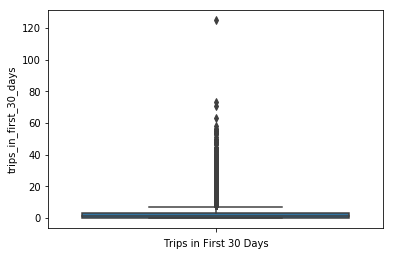

In [19]:
#Create boxplot of Trips in First 30 Days to see why it's going out to 120 above
import seaborn as sns

_ = sns.boxplot(y='trips_in_first_30_days', data=df)
_ = plt.xlabel('Trips in First 30 Days')
plt.show()

       avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
18514      2.02                   4.8                   5.0       1.12   
99         2.86                   4.9                   4.9       1.00   
3030       2.32                   4.8                   4.9       1.06   
29070      1.45                   4.6                   4.0       1.07   
48804      2.30                   4.7                   4.4       1.04   

                 city last_trip_date    phone signup_date  surge_pct  \
18514  King's Landing     2014-06-30   iPhone  2014-01-02       14.4   
99            Astapor     2014-03-05  Android  2014-01-27        0.0   
3030       Winterfell     2014-06-28   iPhone  2014-01-06        2.9   
29070         Astapor     2014-06-29   iPhone  2014-01-10        7.3   
48804         Astapor     2014-06-05   iPhone  2014-01-24        3.1   

       trips_in_first_30_days  ultimate_black_user  weekday_pct  retained  
18514                     125                 

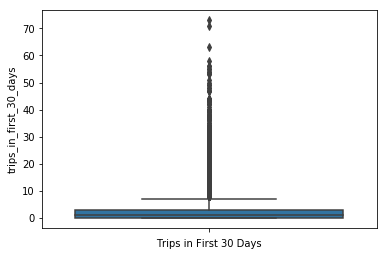

In [20]:
#Drop the outlier for trips in first 30 days
df1 = df.sort_values('trips_in_first_30_days', ascending=False)
print(df1.head())

#Using the sorted Dataframe to identify the exact value to drop
df = df[df.trips_in_first_30_days != 125]

_ = sns.boxplot(y='trips_in_first_30_days', data=df)
_ = plt.xlabel('Trips in First 30 Days')
plt.show()

In [21]:
#Turn Ultimate black users True/False into 1, 0 format

df['ultimate_black_user'] = [1 if ele == True else 0 for ele in df['ultimate_black_user']]

#Create categorical columns for iPhone and Android
df['iphone'] = [1 if ele == "iPhone" else 0 for ele in df['phone']]
df['android'] = [1 if ele == "Android" else 0 for ele in df['phone']]

#Create columns for city data
df['winterfell'] = [1 if ele == "Winterfell" else 0 for ele in df['city']]
df['astapor'] = [1 if ele == "Astapor" else 0 for ele in df['city']]
df['kings_landing'] = [1 if ele == "King's Landing" else 0 for ele in df['city']]

#Drop the original string columns
df = df.drop(['city', 'phone'], axis=1)

print(df.head())

   avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
0      3.67                   5.0                   4.7       1.10   
1      8.26                   5.0                   5.0       1.00   
2      0.77                   5.0                   4.3       1.00   
3      2.36                   4.9                   4.6       1.14   
4      3.13                   4.9                   4.4       1.19   

  last_trip_date signup_date  surge_pct  trips_in_first_30_days  \
0     2014-06-17  2014-01-25       15.4                       4   
1     2014-05-05  2014-01-29        0.0                       0   
2     2014-01-07  2014-01-06        0.0                       3   
3     2014-06-29  2014-01-10       20.0                       9   
4     2014-03-15  2014-01-27       11.8                      14   

   ultimate_black_user  weekday_pct  retained  iphone  android  winterfell  \
0                    1         46.2         1       1        0           0   
1                   

In [22]:
from datetime import date
import dateutil

df['signup_date'] = [dateutil.parser.parse(x) for x in df['signup_date']]
df['last_trip_date'] = [dateutil.parser.parse(x) for x in df['last_trip_date']]

print(df.info())

df['daysbtwn_lastride_&_signup'] = df['last_trip_date'] - df['signup_date']

print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49999 entries, 0 to 49999
Data columns (total 16 columns):
avg_dist                  49999 non-null float64
avg_rating_by_driver      49999 non-null float64
avg_rating_of_driver      49999 non-null float64
avg_surge                 49999 non-null float64
last_trip_date            49999 non-null datetime64[ns]
signup_date               49999 non-null datetime64[ns]
surge_pct                 49999 non-null float64
trips_in_first_30_days    49999 non-null int64
ultimate_black_user       49999 non-null int64
weekday_pct               49999 non-null float64
retained                  49999 non-null int64
iphone                    49999 non-null int64
android                   49999 non-null int64
winterfell                49999 non-null int64
astapor                   49999 non-null int64
kings_landing             49999 non-null int64
dtypes: datetime64[ns](2), float64(6), int64(8)
memory usage: 6.5 MB
None
   avg_dist  avg_rating_by_driver  

In [23]:
#Convert the days between column to a float
df['daysbtwn_lastride_&_signup'] = df['daysbtwn_lastride_&_signup'].dt.days

#Drop the date columns
df = df.drop(['signup_date', 'last_trip_date'], axis=1)
df.head()


,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained,iphone,android,winterfell,astapor,kings_landing,daysbtwn_lastride_&_signup
0,3.67,5.0,4.7,1.10,15.4,4,1,46.2,1,1,0,0,0,1,143
1,8.26,5.0,5.0,1.00,0.0,0,0,50.0,0,0,1,0,1,0,96
2,0.77,5.0,4.3,1.00,0.0,3,0,100.0,0,1,0,0,1,0,1
3,2.36,4.9,4.6,1.14,20.0,9,1,80.0,1,1,0,0,0,1,170
4,3.13,4.9,4.4,1.19,11.8,14,0,82.4,0,0,1,1,0,0,47


In [50]:
y = df['retained'].values
X = df.drop('retained', axis = 1).values

print(X)

[[   3.67          5.            4.7        ...,    0.            1.          143.        ]
 [   8.26          5.            5.         ...,    1.            0.           96.        ]
 [   0.77          5.            4.3        ...,    1.            0.            1.        ]
 ..., 
 [   3.86          5.            5.         ...,    0.            0.          111.        ]
 [   4.58          3.5           3.         ...,    1.            0.            1.        ]
 [   3.49          5.            4.60155929 ...,    1.            0.           92.        ]]


In [25]:
#Split the data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21, stratify=y)

print ('Train shape: '+ str(X_train.shape)+str(y_train.shape))
print ('Test shape: ' +str(X_test.shape)+str( y_test.shape))

Train shape: (39999, 14)(39999,)
Test shape: (10000, 14)(10000,)


In [26]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model = LogisticRegression()

model.fit(X_train, y_train)

predicted = model.predict(X_test)
probs = model.predict_proba(X_test)

print ('Accuracy Score:', metrics.accuracy_score(y_test, predicted))
print ('ROC Score:', metrics.roc_auc_score(y_test, probs[:, 1]))

print(confusion_matrix(y_test, predicted))
print(classification_report(y_test, predicted))

Accuracy Score: 0.9586
ROC Score: 0.994478982824
[[6007  232]
 [ 182 3579]]
             precision    recall  f1-score   support

          0       0.97      0.96      0.97      6239
          1       0.94      0.95      0.95      3761

avg / total       0.96      0.96      0.96     10000



In [27]:
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)

print (scores)
print (scores.mean())

[ 0.95660868  0.95840832  0.95880824  0.9592      0.962       0.9586
  0.95939188  0.96159232  0.96079216  0.95779156]
0.959319314854




Confusion Matrix for Classification Model:

 [[6007  232]
 [ 182 3579]]


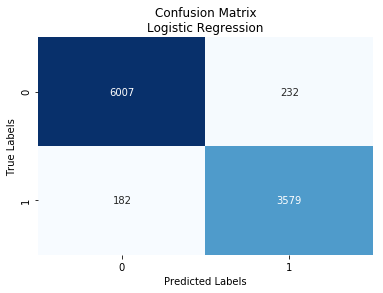

In [28]:
#Printing confusion Matrix
logreg_confusion_matrix = confusion_matrix(y_test, predicted, labels=[0,1])
print("\n\nConfusion Matrix for Classification Model:\n\n",logreg_confusion_matrix)

plt.figure()
sns.heatmap(logreg_confusion_matrix, annot=True, cbar=False, cmap="Blues", fmt="d") 
#string formatting 'd' gives decimal integer
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix\nLogistic Regression")

plt.show()

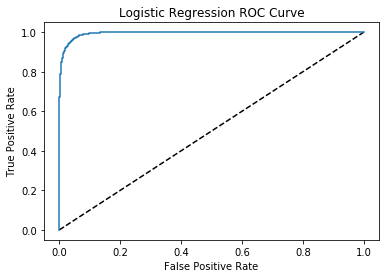

In [29]:
#Printing ROC Curve
from sklearn.metrics import roc_curve
y_pred_prob = model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label= 'Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')

plt.show();

Those results are so strong, second approach:

In [30]:
#Create a new column that identifies "retained" customers if they've taken a trip within the preceding 30 days
#(last date on file is 7/1/14) and they took more than 1 trip in their first 30 days.
with open('./ultimate_data_challenge.json') as file:
    data = json.load(file)

df_new = pd.DataFrame(data)
df_new.head()

df_new['recent'] = [1 if ele >= '2014-06-01' else 0 for ele in df_new['last_trip_date']]
df_new['frequent'] = [1 if ele > 1 else 0 for ele in df_new['trips_in_first_30_days']]
df_new['sum'] = df_new['recent'] + df_new['frequent']
df_new['retained'] = [1 if ele == 2 else 0 for ele in df_new['sum']]

#Replace missing values for avg_rating_by_driver and avg_rating_of_driver with the mean

df_new.avg_rating_by_driver.fillna(df_new.avg_rating_by_driver.mean(), inplace=True)
df_new.avg_rating_of_driver.fillna(df_new.avg_rating_of_driver.mean(), inplace=True)

print(df_new.info())

print(df_new.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
recent                    50000 non-null int64
frequent                  50000 non-null int64
sum                       50000 non-null int64
retained                  50000 non-null int64
dtypes: bool(1), float64(6), int64(5), object(4)
memory usage: 5.8+ MB
None
   avg_dist  avg_rating_by_driver  avg_rating_of

In [31]:
df_new.retained.value_counts()

0    39901
1    10099
Name: retained, dtype: int64

In [32]:
#Count the number of customers considered retained (took more than 1 trip within 30 days of signup)
ret_status = df_new['retained'].value_counts()
notret = float(ret_status[0])
retained = float(ret_status[1])
total_subs = float(len(df2))
per_not_ret = float(notret/total_subs)
per_retained = float(retained/total_subs)

print('Number of Subscribers Not Retained:',"{0:,.0f}".format(notret))
print('Number of Subscribers Retained:', "{0:,.0f}".format(retained))
print('Percentage of Subscribers Not Retained:', "{:.2%}".format(per_not_ret))
print('Percentage of Subscribers Retained:', "{:.2%}".format(per_retained))

Number of Subscribers Not Retained: 39,901
Number of Subscribers Retained: 10,099
Percentage of Subscribers Not Retained: 79.80%
Percentage of Subscribers Retained: 20.20%


In [33]:
#Drop the outlier
df_new = df_new[df_new.trips_in_first_30_days != 125]

#Turn Ultimate black users True/False into 1, 0 format

df_new['ultimate_black_user'] = [1 if ele == True else 0 for ele in df_new['ultimate_black_user']]

#Create categorical columns for iPhone and Android
df_new['phone'] = [1 if ele == "iPhone" else 2 for ele in df_new['phone']]

#Create columns for city data
df_new['city'] = [1 if ele == "Winterfell" else 2 if ele == "Astapor" else 3 for ele in df_new['city']]

print(df_new.head())

   avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  city  \
0      3.67                   5.0                   4.7       1.10     3   
1      8.26                   5.0                   5.0       1.00     2   
2      0.77                   5.0                   4.3       1.00     2   
3      2.36                   4.9                   4.6       1.14     3   
4      3.13                   4.9                   4.4       1.19     1   

  last_trip_date  phone signup_date  surge_pct  trips_in_first_30_days  \
0     2014-06-17      1  2014-01-25       15.4                       4   
1     2014-05-05      2  2014-01-29        0.0                       0   
2     2014-01-07      1  2014-01-06        0.0                       3   
3     2014-06-29      1  2014-01-10       20.0                       9   
4     2014-03-15      2  2014-01-27       11.8                      14   

   ultimate_black_user  weekday_pct  recent  frequent  sum  retained  
0                    1     

In [34]:
#Drop the date columns
df_new = df_new.drop(['signup_date', 'last_trip_date', 'recent', 'frequent', 'sum'], axis=1)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49999 entries, 0 to 49999
Data columns (total 11 columns):
avg_dist                  49999 non-null float64
avg_rating_by_driver      49999 non-null float64
avg_rating_of_driver      49999 non-null float64
avg_surge                 49999 non-null float64
city                      49999 non-null int64
phone                     49999 non-null int64
surge_pct                 49999 non-null float64
trips_in_first_30_days    49999 non-null int64
ultimate_black_user       49999 non-null int64
weekday_pct               49999 non-null float64
retained                  49999 non-null int64
dtypes: float64(6), int64(5)
memory usage: 4.6 MB


In [35]:
y1 = df_new['retained'].values
X1 = df_new.drop('retained', axis = 1).values

print(y1)

[1 0 0 ..., 0 0 0]


In [36]:
#Split the data into training and test set
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 21, stratify=y)

print ('Train shape: '+ str(X_train1.shape)+str(y_train1.shape))
print ('Test shape: ' +str(X_test1.shape)+str( y_test1.shape))

Train shape: (39999, 10)(39999,)
Test shape: (10000, 10)(10000,)


In [37]:
#Logistic Regression
model1 = LogisticRegression()

model1.fit(X_train1, y_train1)

predicted1 = model1.predict(X_test1)
probs1 = model1.predict_proba(X_test1)

print ('Accuracy Score:', metrics.accuracy_score(y_test1, predicted1))
print ('ROC Score:', metrics.roc_auc_score(y_test1, probs1[:, 1]))

print(confusion_matrix(y_test1, predicted1))
print(classification_report(y_test1, predicted1))

Accuracy Score: 0.8435
ROC Score: 0.887759787937
[[7722  272]
 [1293  713]]
             precision    recall  f1-score   support

          0       0.86      0.97      0.91      7994
          1       0.72      0.36      0.48      2006

avg / total       0.83      0.84      0.82     10000



In [38]:
scores1 = cross_val_score(LogisticRegression(), X1, y1, scoring='accuracy', cv=10)

print (scores1)
print (scores1.mean())

[ 0.84163167  0.8412      0.84        0.8496      0.8414      0.8418
  0.8408      0.8412      0.84876975  0.84176835]
0.842816978129




Confusion Matrix for Classification Model:

 [[7722  272]
 [1293  713]]


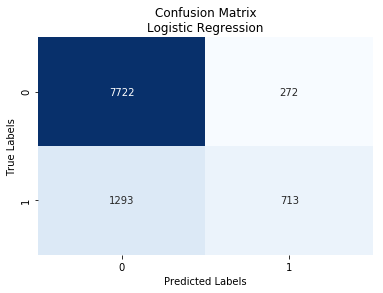

In [39]:
#Printing confusion Matrix
logreg_confusion_matrix1 = confusion_matrix(y_test1, predicted1, labels=[0,1])
print("\n\nConfusion Matrix for Classification Model:\n\n",logreg_confusion_matrix1)

plt.figure()
sns.heatmap(logreg_confusion_matrix1, annot=True, cbar=False, cmap="Blues", fmt="d") 
#string formatting 'd' gives decimal integer
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix\nLogistic Regression")

plt.show()

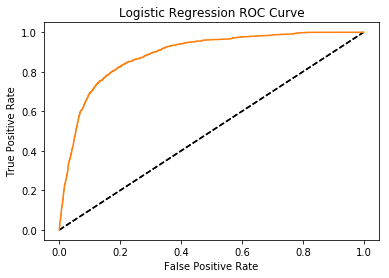

In [41]:
#Printing ROC Curve
y_pred_prob1 = model1.predict_proba(X_test1)[:,1]

fpr1, tpr1, thresholds1 = roc_curve(y_test1, y_pred_prob1)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1, tpr1, label= 'Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')

plt.show()

In [42]:
#Random Forest on first X, y values
import statsmodels.api as sm
import matplotlib as mpl
import pylab
import scipy.stats as stats
from patsy import dmatrices
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor

%matplotlib inline 
mpl.style.available
mpl.style.use('ggplot') 

C:\Users\jrenaud\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [43]:
model3 = RandomForestClassifier(n_estimators=5)
model3.fit(X_train, y_train)

predicted3 = model3.predict(X_test)
probs3 = model3.predict_proba(X_test)

print (metrics.accuracy_score(y_test, predicted3))
print (metrics.roc_auc_score(y_test, probs3[:, 1]))
print (classification_report(y_test, predicted3))

0.9537
0.981695963572
             precision    recall  f1-score   support

          0       0.97      0.96      0.96      6239
          1       0.93      0.95      0.94      3761

avg / total       0.95      0.95      0.95     10000



In [45]:
# percentage tells you how much predicition you would get if you always predict a zero outcome (i.e. the division of 0 versus 1 outcomes)

len_y=len(y)
temp=[i for i in y if i==0]
temp_1=temp.count(0)

percentage = float(temp_1)/float(len_y)
print (percentage *100)

62.3932478649573


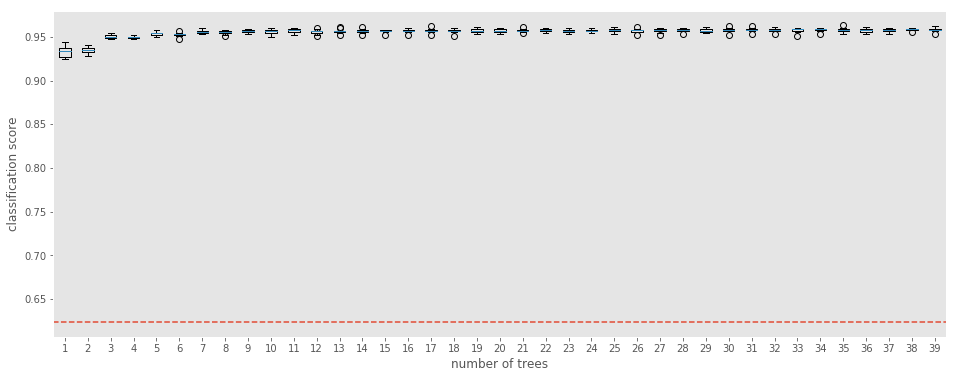

In [46]:
scores=[]
for val in range (1,40):
    clf=RandomForestClassifier(n_estimators=val)
    validated=cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    scores.append(validated)

fig, axes = plt.subplots(figsize=(16,6))
bp = plt.boxplot(scores)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='o')
plt.axhline(y=percentage, ls='--')
plt.xlabel('number of trees')
plt.ylabel('classification score')
plt.grid()

In [51]:
#Repeat on 2nd dataset
model4 = RandomForestClassifier(n_estimators=5)
model4.fit(X_train1, y_train1)

predicted4 = model4.predict(X_test1)
probs4 = model4.predict_proba(X_test1)

print (metrics.accuracy_score(y_test1, predicted4))
print (metrics.roc_auc_score(y_test1, probs4[:, 1]))
print (classification_report(y_test1, predicted4))

0.888
0.92103608489
             precision    recall  f1-score   support

          0       0.93      0.93      0.93      7994
          1       0.72      0.72      0.72      2006

avg / total       0.89      0.89      0.89     10000



In [52]:
# percentage tells you how much predicition you would get if you always predict a zero outcome (i.e. the division of 0 versus 1 outcomes)

len_y1=len(y1)
temp1=[i for i in y1 if i==0]
temp_2=temp1.count(0)

percentage1 = float(temp_2)/float(len_y1)
print (percentage1 *100)

79.80359607192143


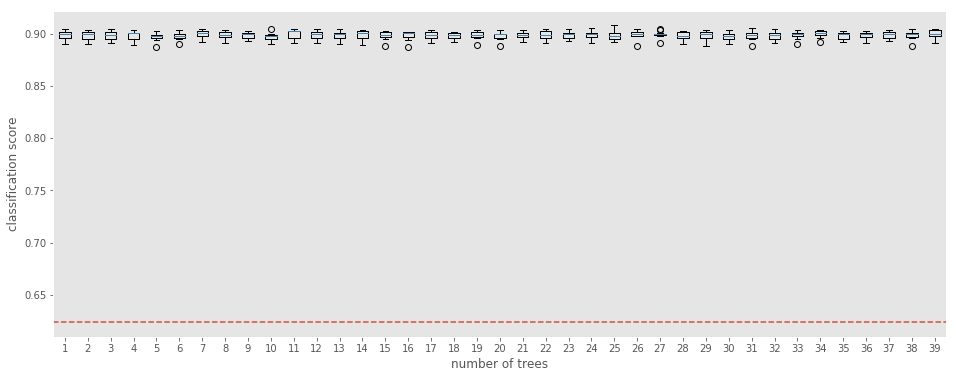

In [53]:
scores=[]
for val in range (1,40):
    clf1=RandomForestClassifier(n_estimators=val)
    validated1=cross_val_score(clf, X1, y1, cv=10, scoring='accuracy')
    scores.append(validated1)

fig, axes = plt.subplots(figsize=(16,6))
bp = plt.boxplot(scores)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='o')
plt.axhline(y=percentage, ls='--')
plt.xlabel('number of trees')
plt.ylabel('classification score')
plt.grid()